In [67]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
import warnings; warnings.filterwarnings(action='once')

Setup Complete


In [68]:
pip install brewer2mpl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [70]:
# Read the file into a variable Europe_Population_Data
Europe_data = pd.read_csv("/content/drive/MyDrive/Interesting Data to Visualize/europe.csv")

In [71]:
Europe_data.head()

,Unnamed: 0,country_name,Continent,region,local_name,capital,area,population,population_per_sq_km,male_life_expectancy,female_life_expectancy,birth_rate,death_rate
0,0,Austria,Europe,Western Europe,Österreich,Vienna,"83,879 km²","8,917,000",106.3,78.9,83.6,9.4,10.3
1,1,Belgium,Europe,Western Europe,België / Belgique,Brussels,"30,530 km²","11,544,000",378.1,78.6,83.1,9.9,11.0
2,2,France,Europe,Western Europe,France,Paris,"549,087 km²","67,380,000",122.7,79.2,85.3,10.9,9.9
3,3,Germany,Europe,Western Europe,Deutschland,Berlin,"357,580 km²","83,161,000",232.6,78.6,83.4,9.3,11.9
4,4,Liechtenstein,Europe,Western Europe,Liechtenstein,Vaduz,161 km²,"38,137",237.6,80.1,83.6,9.1,8.2


Check for the missing values first

In [72]:
Europe_data.isna().sum()

Unnamed: 0                0
country_name              0
Continent                 0
region                    0
local_name                0
capital                   0
area                      0
population                0
population_per_sq_km      0
male_life_expectancy      0
female_life_expectancy    0
birth_rate                0
death_rate                0
dtype: int64

We can see that their are no missing values. So let's go to the next part

In [73]:
cols_drop = ['Unnamed: 0', 'Continent', 'local_name', 'capital']

Europe_data.drop(cols_drop, axis=1, inplace=True)

In [74]:
Europe_data.head()

,country_name,region,area,population,population_per_sq_km,male_life_expectancy,female_life_expectancy,birth_rate,death_rate
0,Austria,Western Europe,"83,879 km²","8,917,000",106.3,78.9,83.6,9.4,10.3
1,Belgium,Western Europe,"30,530 km²","11,544,000",378.1,78.6,83.1,9.9,11.0
2,France,Western Europe,"549,087 km²","67,380,000",122.7,79.2,85.3,10.9,9.9
3,Germany,Western Europe,"357,580 km²","83,161,000",232.6,78.6,83.4,9.3,11.9
4,Liechtenstein,Western Europe,161 km²,"38,137",237.6,80.1,83.6,9.1,8.2


In [75]:
Europe_data['area'] = [float(''.join(val.strip(' km²').split(','))) for val in Europe_data['area']]
Europe_data['population'] = [int(''.join(val.split(','))) for val in Europe_data['population']]
Europe_data['population_per_sq_km'] = [float(''.join(val.split(','))) for val in Europe_data['population_per_sq_km']]

In [76]:
Europe_data.head()

,country_name,region,area,population,population_per_sq_km,male_life_expectancy,female_life_expectancy,birth_rate,death_rate
0,Austria,Western Europe,83879.0,8917000,106.3,78.9,83.6,9.4,10.3
1,Belgium,Western Europe,30530.0,11544000,378.1,78.6,83.1,9.9,11.0
2,France,Western Europe,549087.0,67380000,122.7,79.2,85.3,10.9,9.9
3,Germany,Western Europe,357580.0,83161000,232.6,78.6,83.4,9.3,11.9
4,Liechtenstein,Western Europe,161.0,38137,237.6,80.1,83.6,9.1,8.2


we are checking for the correlation

In [77]:
Europe_data.corr()

,area,population,population_per_sq_km,male_life_expectancy,female_life_expectancy,birth_rate,death_rate
area,1.000000,0.743109,-0.107990,-0.343102,-0.318392,0.012979,0.193202
population,0.743109,1.000000,-0.070983,-0.213150,-0.163828,-0.085337,0.205138
population_per_sq_km,-0.107990,-0.070983,1.000000,0.295927,0.253222,-0.142105,-0.273199
male_life_expectancy,-0.343102,-0.213150,0.295927,1.000000,0.942122,0.226645,-0.831404
female_life_expectancy,-0.318392,-0.163828,0.253222,0.942122,1.000000,0.094131,-0.765837
birth_rate,0.012979,-0.085337,-0.142105,0.226645,0.094131,1.000000,-0.481740
death_rate,0.193202,0.205138,-0.273199,-0.831404,-0.765837,-0.481740,1.000000


From above we can see strong correlation among:

*   Area - Population & Area - Death_rate
*   Population - Death rate.
*   population_per_sq_km - male_life_expectancy and female_life_expectancy
*   male_life_expectancy - female_life_expectancy and birth_rate
*   birth rate - male_life_expectancy

So from above we can conclude that all the features are not dependent on each other.

Let's visualize the ratio of data on the basis of region

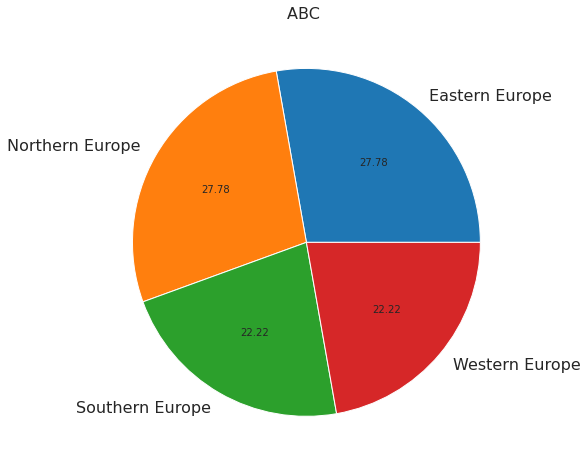

In [78]:
Europe_data.groupby('region').size().plot(kind='pie',figsize=(8, 8), autopct='%.2f', ylabel='Dataset Ratio')
plt.title("ABC ")
plt.ylabel("")
plt.show()

From the above pie chart we can say that our dataset is almost balanced with respect to region but we can't give our conclusion on this

Their is strong correlation between life expectancy of women and Men so we will make scatter plot of Life expectancy OF WOMEN VS MEN .

No handles with labels found to put in legend.


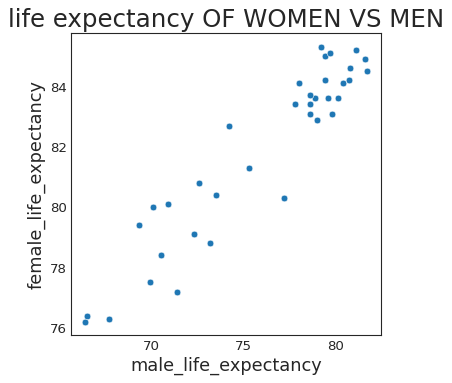

In [79]:
plt.figure(figsize=(5 , 5), dpi= 80, facecolor='w', edgecolor='k')
sns.scatterplot(x=Europe_data['male_life_expectancy'],y=Europe_data['female_life_expectancy'])
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("life expectancy OF WOMEN VS MEN", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

In [80]:
Europe_data.describe()

,area,population,population_per_sq_km,male_life_expectancy,female_life_expectancy,birth_rate,death_rate
count,3.600000e+01,3.600000e+01,36.000000,36.000000,36.000000,36.000000,36.000000
mean,6.283601e+05,1.875021e+07,156.423222,75.944444,81.847222,9.619444,11.355556
std,2.828483e+06,3.003609e+07,267.843281,4.722496,2.884291,1.109908,2.968833
min,1.610000e+02,3.813700e+04,3.558000,66.400000,76.200000,7.100000,6.300000
25%,4.147975e+04,2.751250e+06,45.132500,72.075000,79.850000,8.975000,9.475000
50%,8.611950e+04,7.785500e+06,96.165000,78.300000,83.100000,9.650000,11.200000
75%,2.608775e+05,1.301850e+07,135.675000,79.625000,84.125000,10.225000,12.700000
max,1.709825e+07,1.441040e+08,1610.000000,81.700000,85.300000,12.300000,18.000000


Now let's look at top 10 countries having higher life expectancy.

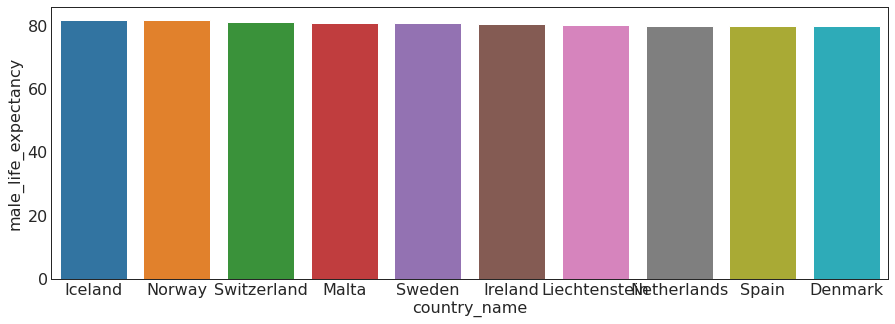

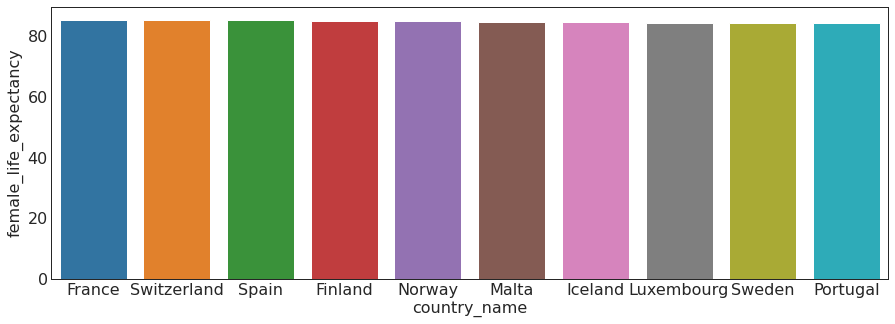

In [81]:
male_life_exp = (Europe_data.sort_values(by=['male_life_expectancy'],ascending=False).head(10)).index.values
sorted_data_male = Europe_data.reindex(male_life_exp)

#Visualization

plt.figure(figsize=(15,5))
sns.barplot(x=sorted_data_male['country_name'],y=sorted_data_male['male_life_expectancy'])

female_life_exp = (Europe_data.sort_values(by=['female_life_expectancy'],ascending=False).head(10)).index.values
sorted_data_female = Europe_data.reindex(female_life_exp)

#Visualization

plt.figure(figsize=(15,5))
sns.barplot(x=sorted_data_female['country_name'],y=sorted_data_female['female_life_expectancy'])

we can see the top 10 countries having highest birth/death rate.

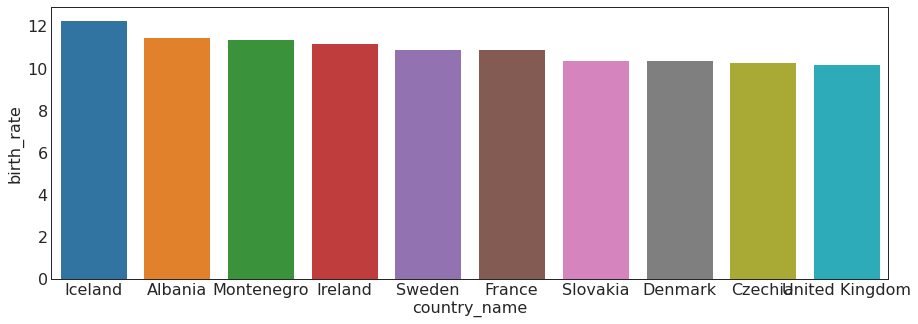

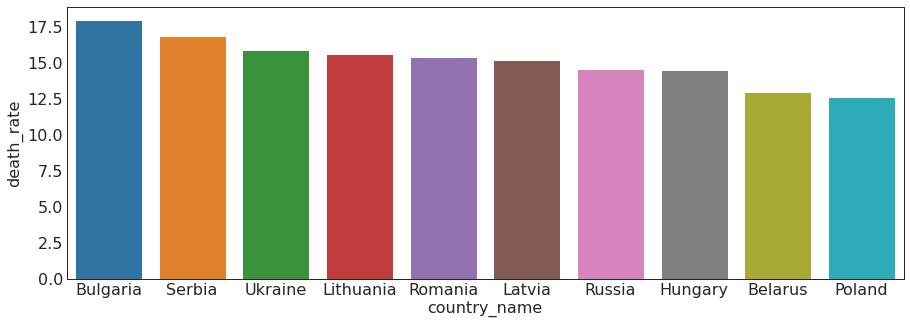

In [82]:
birth_rate = (Europe_data.sort_values(by=['birth_rate'],ascending=False).head(10)).index.values
sorted_birth_data = Europe_data.reindex(birth_rate)

#Visualization

plt.figure(figsize=(15,5))
sns.barplot(x=sorted_birth_data['country_name'],y=sorted_birth_data['birth_rate'])

death_rate = (Europe_data.sort_values(by=['death_rate'],ascending=False).head(10)).index.values
sorted_death_data = Europe_data.reindex(death_rate)

#Visualization

plt.figure(figsize=(15,5))
sns.barplot(x=sorted_death_data['country_name'],y=sorted_death_data['death_rate'])

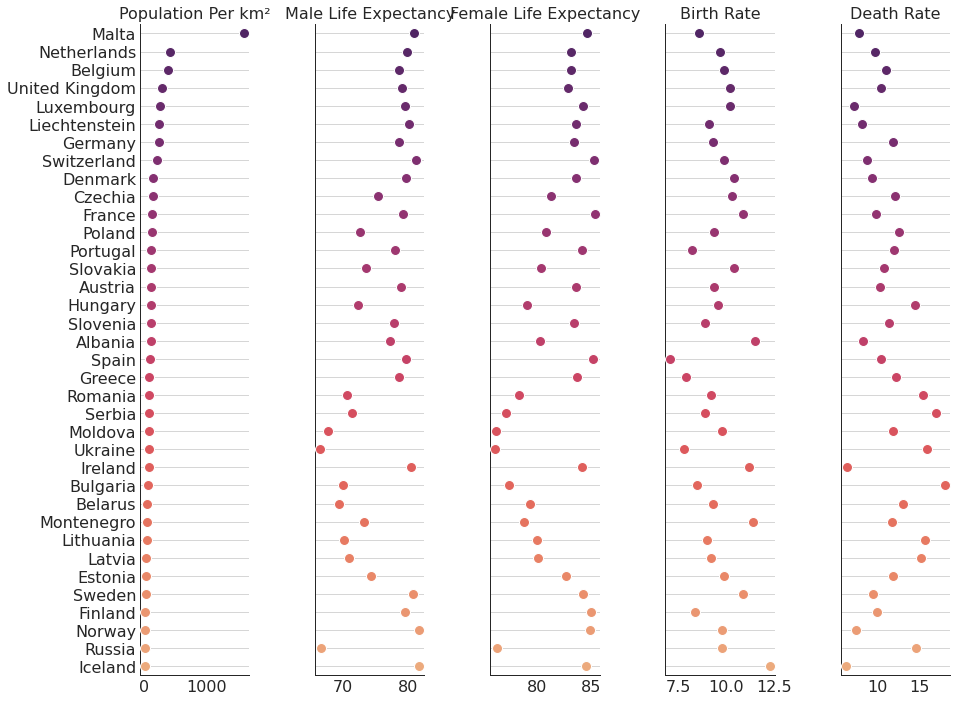

In [83]:
col = ["population_per_sq_km","male_life_expectancy","female_life_expectancy","birth_rate","death_rate"]
g = sns.PairGrid(Europe_data.sort_values("population_per_sq_km", ascending=False),
                 x_vars=col, y_vars=["country_name"],height=10, aspect=.25)
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

g.set(xlabel="", ylabel="")

titles = ["Population Per km²", "Male Life Expectancy",
          "Female Life Expectancy", "Birth Rate","Death Rate"]
for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)


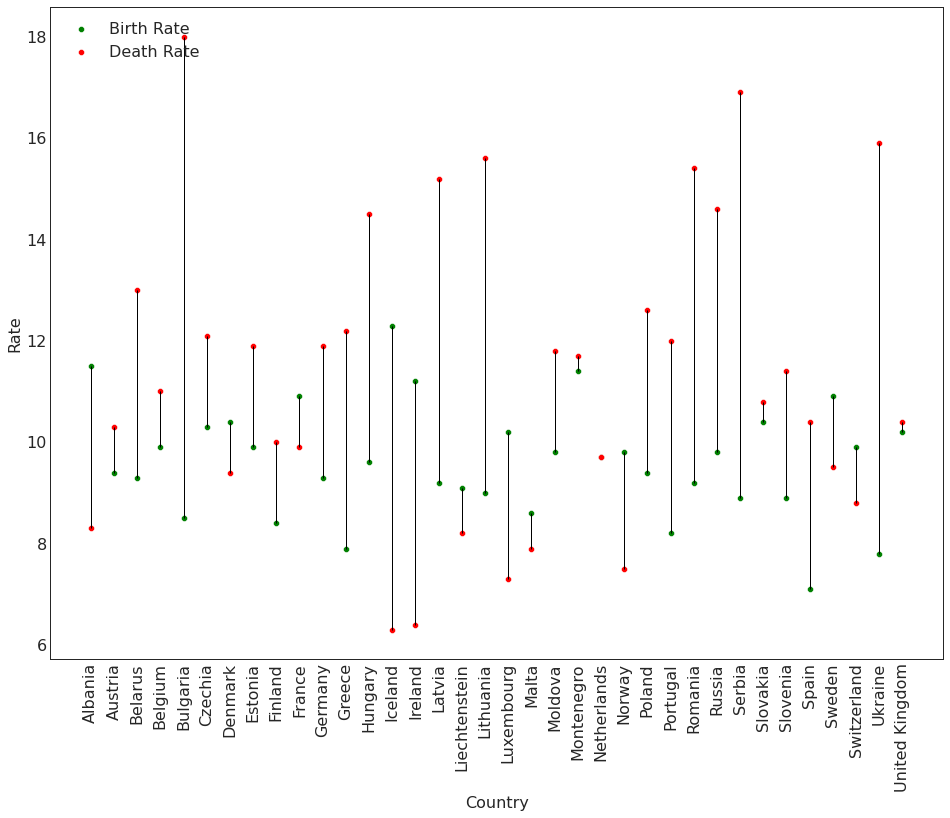

In [84]:
plt.figure(figsize=(16,12))
sns.scatterplot(data = Europe_data.sort_values("country_name"), x="country_name", y="birth_rate", color="green")
sns.scatterplot(data = Europe_data.sort_values("country_name"), x="country_name", y="death_rate", color="red")
for country in Europe_data.sort_values("country_name")["country_name"]:
    c = Europe_data.query("country_name=='{}'".format(country))
    birth_rate = c.birth_rate.values[0]
    death_rate = c.death_rate.values[0]
    if birth_rate < death_rate:
        ymin=birth_rate
        ymax=death_rate
    else:
        ymax=birth_rate
        ymin=death_rate
    plt.vlines(x=country, ymin=ymin, ymax=ymax, lw=1, color="k")
plt.xticks(rotation=90)
plt.legend(["Birth Rate","Death Rate"],loc="upper left")
plt.xlabel("Country")
plt.ylabel("Rate")
plt.show()

Life Expectancy

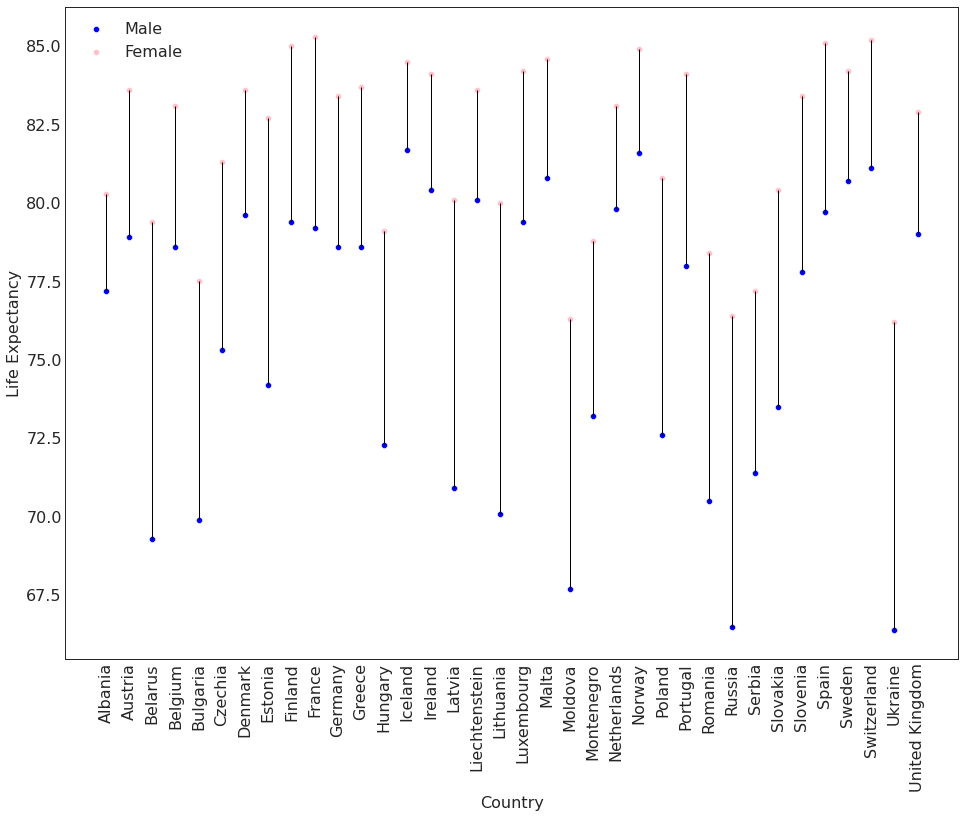

In [85]:
plt.figure(figsize=(16,12))
sns.scatterplot(data = Europe_data.sort_values("country_name"), x="country_name", y="male_life_expectancy", color="blue")
sns.scatterplot(data = Europe_data.sort_values("country_name"), x="country_name", y="female_life_expectancy", color="pink")
for country in Europe_data.sort_values("country_name")["country_name"]:
    c = Europe_data.query("country_name=='{}'".format(country))
    male_life_expectancy = c.male_life_expectancy.values[0]
    female_life_expectancy = c.female_life_expectancy.values[0]
    if male_life_expectancy < female_life_expectancy:
        ymin=male_life_expectancy
        ymax=female_life_expectancy
    else:
        ymax=male_life_expectancy
        ymin=female_life_expectancy
    plt.vlines(x=country, ymin=ymin, ymax=ymax, lw=1, color="k")
plt.xticks(rotation=90)
plt.legend(["Male","Female"],loc="upper left")
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.show()

Region

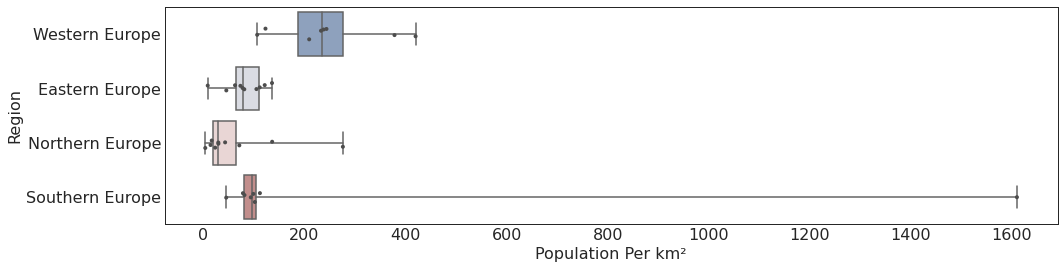

In [86]:
plt.figure(figsize=(16,4))
sns.boxplot(data=Europe_data, y="region", x="population_per_sq_km",whis=[0, 100], width=.8, palette="vlag")
sns.stripplot(x="population_per_sq_km", y="region", data=Europe_data,size=4, color=".3", linewidth=0)
plt.xlabel("Population Per km²")
plt.ylabel("Region")
plt.show()

In [87]:
table = Europe_data.groupby(["region"])["population"].sum().reset_index().sort_values("population",ascending=False)
table.columns = ["Region","Population"]
table.set_index("Region").head(10).style.background_gradient("Greens")

,Population
Region,
Eastern Europe,290237000
Western Europe,197749556
Northern Europe,105684463
Southern Europe,81336638


In [88]:
table = Europe_data[["country_name","population"]].sort_values("population",ascending=False)
table.columns = ["Country","Population"]
table.set_index("Country").head(10).style.background_gradient("Greens")

,Population
Country,
Russia,144104000
Germany,83161000
France,67380000
United Kingdom,67215000
Spain,47363000
Ukraine,44135000
Poland,37899000
Romania,19258000
Netherlands,17442000


In [89]:
table = Europe_data.groupby(["region"])["area"].sum().reset_index().sort_values("area",ascending=False)
table.columns = ["region","area km²"]
table.set_index("region").head(10).style.background_gradient("Greens")

,area km²
region,
Eastern Europe,18826260.000000
Northern Europe,1806009.000000
Western Europe,1106660.000000
Southern Europe,882036.000000


In [90]:
table = Europe_data[["country_name","area"]].sort_values("area",ascending=False)
table.columns = ["Country","Area km²"]
table.set_index("Country").head(10).style.background_gradient("Greens")

,Area km²
Country,
Russia,17098250.000000
Ukraine,603550.000000
France,549087.000000
Spain,505935.000000
Sweden,447430.000000
Norway,385203.000000
Germany,357580.000000
Finland,338450.000000
Poland,312680.000000
